In [ ]:
# 1-How do you install Detectron2 using pip and check the version of Detectron2

!git clone https://github.com/facebookresearch/detectron2.git
!cd detectron2


Cloning into 'detectron2'...
remote: Enumerating objects: 15819, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 15819 (delta 18), reused 8 (delta 8), pack-reused 15786 (from 3)
Receiving objects: 100% (15819/15819), 6.39 MiB | 23.02 MiB/s, done.
Resolving deltas: 100% (11523/11523), done.


In [ ]:
!pip install -e detectron2

Obtaining file:///content/detectron2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.7 MB/s eta 0:00:00
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61396 sha256=00c2e8ad20531076275958b52e8eb5871e26d77ab6a7dc34bc78c0a0f009c0e5
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-

In [ ]:
import torch, detectron2
detectron2.__version__

'0.6'

In [ ]:
# 2 - How do you perform inference with Detectron2 using an online image

from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor


In [ ]:
model_name = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"

In [ ]:
cfg=get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(model_name))

In [ ]:
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_name)

In [ ]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

In [ ]:
predictor=DefaultPredictor(cfg)

model_final_280758.pkl: 167MB [00:00, 198MB/s]                           


In [ ]:
# Load online image
import cv2
import urllib.request
url = "https://wri-india.org/sites/default/files/styles/large/public/pr-reconfiguring-public-spaces-within-new-normal.jpg?itok=gbctp4Nq"
urllib.request.urlretrieve(url, "image.jpg")
image = cv2.imread("image.jpg")

In [ ]:
# Perform inference
outputs = predictor(image)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


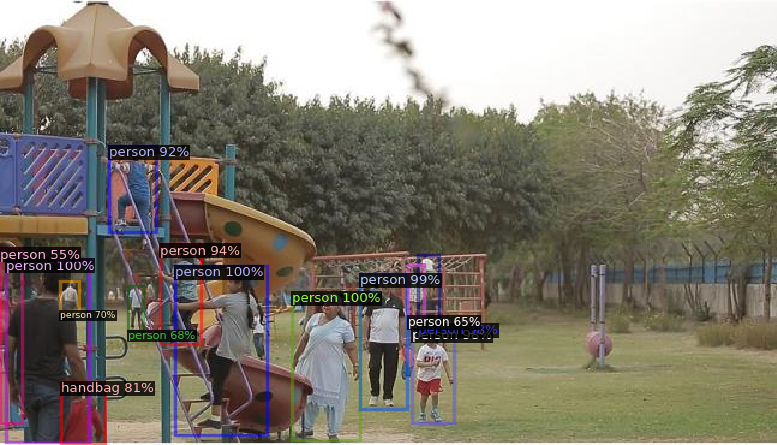

In [ ]:
# Visualize results
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from google.colab.patches import cv2_imshow


# Assuming 'image' and 'outputs' are already defined
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get("coco_2017_train"), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# 3 - How do you visualize evaluation metrics in Detectron2, such as training loss

!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-eququy9i
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-eququy9i
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4823082af157bbc0231091b4b22e1faf72058d46
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 39.4 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp310

In [ ]:
import torch, detectron2
detectron2.__version__

'0.6'

In [ ]:
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.logger import setup_logger
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo
import os

setup_logger()

# Register datasets
register_coco_instances("train_dataset", {}, "/content/datasets/my_datasets/annotations/train_annot.json", "/content/datasets/my_datasets/train")
register_coco_instances("val_dataset", {}, "/content/datasets/my_datasets/annotations/test_annot.json", "/content/datasets/my_datasets/test")

# Config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))  # Use model zoo config
cfg.DATASETS.TRAIN = ("train_dataset",)
cfg.DATASETS.TEST = ("val_dataset",)
cfg.DATALOADER.NUM_WORKERS = 4  # Increased workers for faster data loading

# Use pre-trained weights from the model zoo
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

cfg.SOLVER.IMS_PER_BATCH = 4  # Increased batch size to speed up training
cfg.SOLVER.BASE_LR = 0.0025  # You can adjust this if needed
cfg.SOLVER.MAX_ITER = 500  # Reduced iterations for faster testing (can increase later)
cfg.SOLVER.STEPS = (300, 400)  # Adjust learning rate schedule based on iterations

cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(MetadataCatalog.get("train_dataset").thing_classes)  # Set number of classes
cfg.OUTPUT_DIR = "./output"

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Use GPU for training
cfg.MODEL.DEVICE = "cuda"  # Ensure you are using GPU for faster training

# Train
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.logger import setup_logger
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo
import os

setup_logger()

# Register datasets
register_coco_instances("train_dataset", {}, "/content/datasets/my_datasets/annotations/train_annot.json", "/content/datasets/my_datasets/train")
register_coco_instances("val_dataset", {}, "/content/datasets/my_datasets/annotations/test_annot.json", "/content/datasets/my_datasets/test")

# Config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))  # Use model zoo config
cfg.DATASETS.TRAIN = ("train_dataset",)
cfg.DATASETS.TEST = ("val_dataset",)
cfg.DATALOADER.NUM_WORKERS = 4  # Increased workers for faster data loading

# Use pre-trained weights from the model zoo
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

cfg.SOLVER.IMS_PER_BATCH = 4  # Increased batch size to speed up training
cfg.SOLVER.BASE_LR = 0.0025  # You can adjust this if needed
cfg.SOLVER.MAX_ITER = 500  # Reduced iterations for faster testing (can increase later)
cfg.SOLVER.STEPS = (300, 400)  # Adjust learning rate schedule based on iterations

cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(MetadataCatalog.get("train_dataset").thing_classes)  # Set number of classes
cfg.OUTPUT_DIR = "./output"

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# **Change 1: Set CUDA_LAUNCH_BLOCKING for debugging**
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

# Use GPU for training
cfg.MODEL.DEVICE = "cuda"  # Ensure you are using GPU for faster training


# **Change 2: Wrap training in a try-except block to catch the error**
try:
    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume=False)
    trainer.train()
except RuntimeError as e:
    if "device-side assert triggered" in str(e):
        print("CUDA error detected. Switching to CPU for debugging.")
        cfg.MODEL.DEVICE = "cpu"  # Switch to CPU
        trainer = DefaultTrainer(cfg)
        trainer.resume_or_load(resume=False)
        trainer.train()
    else:
        raise e # Re-raise the exception if it's not the CUDA error

CUDA error detected. Switching to CPU for debugging.
[12/19 09:34:41 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[12/19 09:34:41 d2.engine.train_loop]: Starting training from iteration 0
[12/19 09:36:40 d2.engine.hooks]: Total training time: 0:00:56 (0:00:00 on hooks)
[12/19 09:36:40 d2.utils.events]:  iter: 1  total_loss: 2.18  loss_cls: 2.029  loss_box_reg: 0.1043  loss_rpn_cls: 0.04302  loss_rpn_loc: 0.002966    data_time: 0.4662  last_data_time: 0.4662   lr: 2.5e-06  max_mem: 1120M


KeyboardInterrupt: 

In [ ]:
#   I stop the execution because it will take 6hrs for complete

In [ ]:
# 4 -How do you run inference with TFOD2 on an online image



!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 98987, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 98987 (delta 11), reused 4 (delta 4), pack-reused 98970 (from 2)
Receiving objects: 100% (98987/98987), 622.73 MiB | 27.65 MiB/s, done.
Resolving deltas: 100% (71977/71977), done.


In [ ]:
%cd models/research

[Errno 2] No such file or directory: 'models/research'
/content/models/research/models/research


In [ ]:
# From within TensorFlow/models/research/

!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!pip install cython
!pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

  Cloning https://github.com/philferriere/cocoapi.git to /tmp/pip-req-build-7ihtbib6
  Running command git clone --filter=blob:none --quiet https://github.com/philferriere/cocoapi.git /tmp/pip-req-build-7ihtbib6
  Resolved https://github.com/philferriere/cocoapi.git to commit 2929bd2ef6b451054755dfd7ceb09278f935f7ad
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=375977 sha256=6a9e21b22104aa651e14b36c57e146b47cd745594c79efd619a290153cfc6ff1
  Stored in directory: /tmp/pip-ephem-wheel-cache-gzqclb8q/wheels/8e/1a/5f/0c984ae3d65a4d7da4ba3407d2a8d8c8e85dd55f84d4936f04
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.8
    Uninstalling pycocotools-2.0.8:
      Successfully uninstalled pycocotools-2.0.8


In [ ]:
# From within TensorFlow/models/research/
%cd models/research
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

[Errno 2] No such file or directory: 'models/research'
/content/models/research/models/research
Processing /content/models/research/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━

In [ ]:
!cd /content/training/pre-trained_models

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2024-12-20 10:24:47--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.183.207, 74.125.201.207, 74.125.202.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.183.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M  77.8MB/s    in 3.0s    

2024-12-20 10:24:50 (77.8 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



In [ ]:
!tar -xvf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
cd /content/training

/content/training


In [ ]:
# Create train data:
!python generate_tfrecord.py -x /content/training/images/train -l /content/training/annotations/label_map.pbtxt -o /content/training/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x  /content/training/images/test -l /content/training/annotations/label_map.pbtxt -o /content/training/annotations/test.record


2024-12-20 10:20:26.742509: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734690026.779397   11576 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734690026.790389   11576 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: /content/training/annotations/train.record
2024-12-20 10:20:31.944288: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734690031.970282   11604 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

In [ ]:
!python model_main_tf2.py --model_dir=/content/training/models/my_ssd_resnet101 --pipeline_config_path=models/content/training/models/my_ssd_resnet101/pipeline.config

Traceback (most recent call last):
  File "/content/training/model_main_tf2.py", line 34, in <module>
    from object_detection import model_lib_v2
  File "/usr/local/lib/python3.10/dist-packages/object_detection/model_lib_v2.py", line 29, in <module>
    from object_detection import eval_util
  File "/usr/local/lib/python3.10/dist-packages/object_detection/eval_util.py", line 35, in <module>
    slim = tf.contrib.slim
AttributeError: module 'tensorflow' has no attribute 'contrib'


In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow-object-detection-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.4/744.4 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.5 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844489 sha256=365a32d34db8ddbb4a1313474fae3

In [ ]:
!sudo apt-get install nvidia-cuda-toolkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libaccinj64-11.5 libatk-wrapper-java
  libatk-wrapper-java-jni libbabeltrace1 libcub-dev libcublas11 libcublaslt11
  libcudart11.0 libcufft10 libcufftw10 libcuinj64-11.5 libcupti-dev
  libcupti-doc libcupti11.5 libcurand10 libcusolver11 libcusolvermg11
  libcusparse11 libdebuginfod-common libdebuginfod1 libegl-dev libfontenc1
  libgail-common libgail18 libgl-dev libgl1-mesa-dev libgles-dev libgles1
  libglvnd-core-dev libglvnd-dev libglx-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libipt2 libnppc11 libnppial11 libnppicc11 libnppidei11
  libnppif11 libnppig11 libnppim11 libnppist11 libnppisu11 libnppitc11
  libnpps11 libnvblas11 libnvidia-compute-495 libnvidia-compute-510
  libnvidia-compute-535 libnvidia-ml-dev libnvjpeg11 libnvrtc-builtins11.5
  libnvrtc11.2 libnvtoolsext1 libnvvm4 libopengl-de

In [ ]:
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/nvidia/lib64

In [ ]:
!pip install tensorflow-object-detection-api

In [ ]:
!git clone https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [ ]:
!pip install tensorflow
!pip install cython
!pip install opencv-python
!pip install matplotlib
!pip install pillow
!pip install lxml
!pip install jupyter
!pip install ipykernel

In [ ]:
#  How do you install TensorFlow Object Detection API in Jupyter Notebook

!git clone https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [ ]:
%cd models/research/
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/models/research
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.3 MB)
Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl (6.6 MB)
  Created wheel for object_detection: filename=object_detection-0.1-py3-none-any.whl size=1697357 sha256=174555a8934b77610d5340a496da206b751a919f1fbbc044a04e9d8fc00056fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-tzh46i96/wheels/53/dd/70/2de274d6c443c69d3

In [ ]:
# > How can you load a pre-trained TensorFlow Object Detection model


!pip install tensorflow tensorflow-hub

  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.5 MB/s eta 0:00:00
Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.3 MB)
Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 9.7 MB/s eta 0:00:00
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
  Attempting uninstall: keras
    Found existing installation: ke

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

/usr/local/lib/python3.10/dist-packages/tensorflow_hub/__init__.py:61: UserWarning: Module object_detection was already imported from /usr/local/lib/python3.10/dist-packages/object_detection/__init__.py, but /content/models/research is being added to sys.path
  from pkg_resources import parse_version


In [ ]:
model = hub.load("https://tfhub.dev/tensorflow/efficientdet/d0/1")  ## here i load the model

In [ ]:
print(type(model))

<class 'tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject'>


In [110]:
# How do you preprocess an image from the web for TFOD2 inference

import tensorflow as tf
import cv2
import numpy as np
from urllib.request import urlretrieve

from google.colab.patches import cv2_imshow

# URL of the image
image_url = "https://wri-india.org/sites/default/files/styles/large/public/Featured-image_Raahgiri-Day-Street-stories.jpg?itok=R7b4cRf8"

# Download the image
urlretrieve(image_url, "image.jpg")

# Load the image using OpenCV
image = cv2.imread("image.jpg")

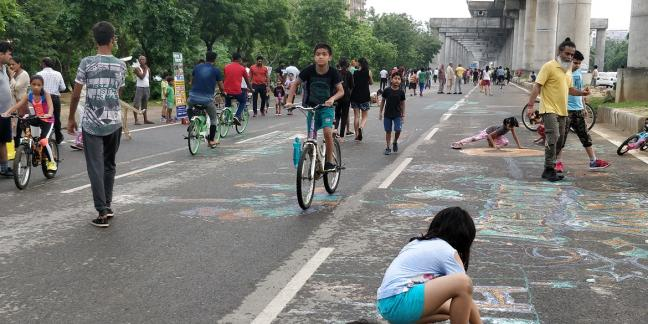

In [111]:
cv2_imshow(image)

In [112]:
# Resize the image (optional)
resized_image = cv2.resize(image, (800, 600))

In [113]:
# Convert the image to RGB format
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [114]:
# Convert the image to RGB format
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [117]:
# Convert the image to a TensorFlow tensor
tensor_image = tf.convert_to_tensor(rgb_image, dtype=tf.float32)

In [7]:
# "> How do you visualize bounding boxes for detected objects in TFOD2 inference
# import tensorflow as tf
# import cv2
# import numpy as np
# from urllib.request import urlretrieve

# from google.colab.patches import cv2_imshow
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

--2024-12-20 13:59:13--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.206.207, 108.177.121.207, 209.85.145.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.206.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46042990 (44M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_32 100%[===================>]  43.91M  --.-KB/s    in 0.1s    

2024-12-20 13:59:13 (299 MB/s) - ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’ saved [46042990/46042990]



In [8]:
!tar -xvf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_320x320_coco17_tpu-8/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [9]:
model=tf.saved_model.load("/content/pre_mod/ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model")

2024-12-20 13:59:23.239299: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


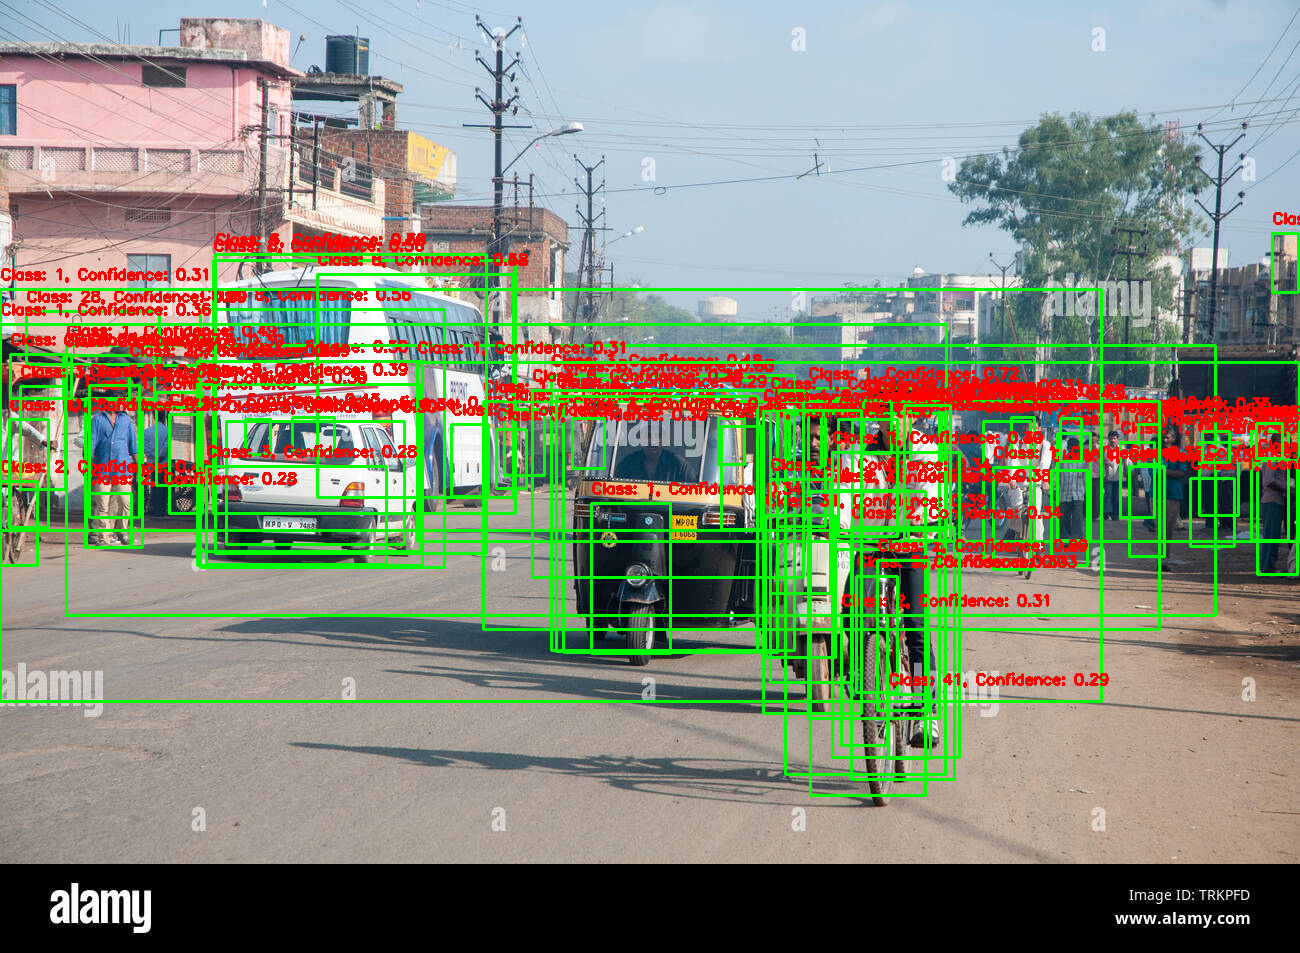

In [20]:
# Load the image
image_path = "/content/traffic-on-the-streets-of-bhopal-in-india-TRKPFD.jpg"
image = cv2.imread(image_path)

# Convert the image to a TensorFlow tensor with uint8
tensor_image = tf.convert_to_tensor(image, dtype=tf.uint8)


input_size = (320, 320)
resized_tensor_image = tf.image.resize(tensor_image, input_size)

# After resizing, cast the image back to uint8
resized_tensor_image = tf.cast(resized_tensor_image, dtype=tf.uint8)

# Expand the dimensions to include batch size
batched_tensor_image = tf.expand_dims(resized_tensor_image, axis=0)

# Get the detection results
detection_results = model(batched_tensor_image)

# Extract the detection boxes, class labels, and confidence scores
detection_boxes = detection_results['detection_boxes'].numpy()[0]
detection_classes = detection_results['detection_classes'].numpy()[0].astype(int)
detection_scores = detection_results['detection_scores'].numpy()[0]

CONFIDENCE_THRESHOLD = 0.3

# Iterate through detections and draw bounding boxes
for i in range(len(detection_boxes)):
    confidence_score = detection_scores[i]
    if confidence_score < CONFIDENCE_THRESHOLD:
        continue  # Skip detections with low confidence

# Draw the bounding boxes
for i in range(len(detection_boxes)):
    ymin, xmin, ymax, xmax = detection_boxes[i]
    height, width, _ = image.shape
    xmin = int(xmin * width)
    ymin = int(ymin * height)
    xmax = int(xmax * width)
    ymax = int(ymax * height)

    # Draw the bounding box
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    # Add the class label and confidence score
    class_label = detection_classes[i]
    confidence_score = detection_scores[i]
    cv2.putText(image, f"Class: {class_label}, Confidence: {confidence_score:.2f}",
                (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
